In [1]:
!wget https://pbs.twimg.com/media/E167M0tWQAgC23h.jpg

--2022-02-15 20:36:05--  https://pbs.twimg.com/media/E167M0tWQAgC23h.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 184.31.10.237, 2600:1480:4000:e5::
Connecting to pbs.twimg.com (pbs.twimg.com)|184.31.10.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118931 (116K) [image/jpeg]
Saving to: ‘E167M0tWQAgC23h.jpg.2’

E167M0tWQAgC23h.jpg 100%[===================>] 116.14K  --.-KB/s    in 0.005s  

2022-02-15 20:36:05 (22.9 MB/s) - ‘E167M0tWQAgC23h.jpg.2’ saved [118931/118931]



In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
IMG_PATH = 'E167M0tWQAgC23h.jpg'

# Считывание изображений

Считать изображение с диска можно с помощью функции imread:

In [4]:
img = cv2.imread(IMG_PATH)

отобразим изображение:

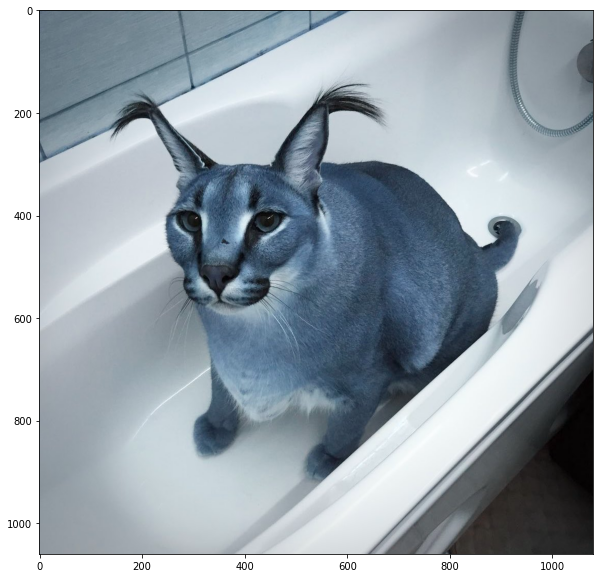

In [5]:
plt.figure(figsize=[10, 10])
plt.imshow(img)

Как видно, цвета изображения неправильные. Это потому, что функция imread считывает изображения в формате BGR (blue, green, red). Чтобы перейти к более привычному представлению RGB (reg, green, blue), который ожидает matplotlib, можно воспользоваться встроенной функцией cvtColor:

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

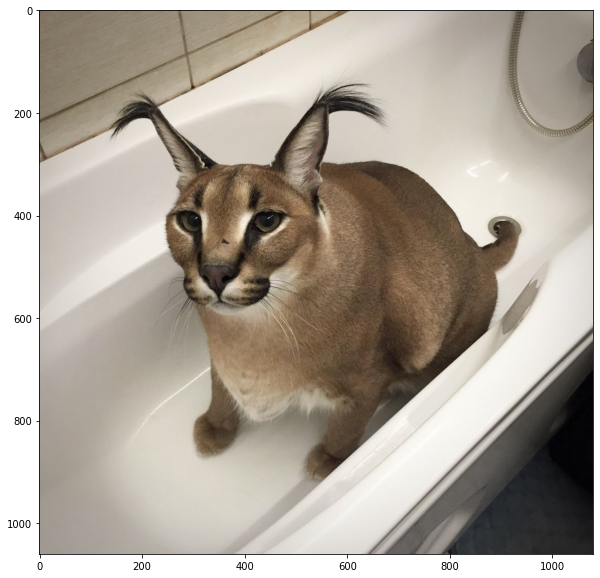

In [7]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

# Работа с изображением

Загруженное цветное изображение является обычным numpy массивом с тремя размерностями, каждый элемент которого - целое беззнаковое 8-ми битное число, представляющее квантованную на 256 уровней интенсивность одного из цветов (RGB: 0 - красный, 1 - зеленый, 2 - синий):

In [8]:
print('type(img_rgb) = ', type(img_rgb))
print('img_rgb.shape = ', img_rgb.shape)
print('img_rgb.dtype = ', img_rgb.dtype)

type(img_rgb) =  <class 'numpy.ndarray'>
img_rgb.shape =  (1060, 1080, 3)
img_rgb.dtype =  uint8


Над изображением можно выполнять те же операции, что и над обычным массивом. Например, рассчитать статистики:

In [9]:
print('img_rgb.min() = ', img_rgb.min())
print('img_rgb.max() = ', img_rgb.max())
print('img_rgb.mean() = ', img_rgb.mean())
print('img_rgb.std() = ', img_rgb.std())
print('np.median(img_rgb) = ', np.median(img_rgb))

img_rgb.min() =  0
img_rgb.max() =  255
img_rgb.mean() =  152.95307389937108
img_rgb.std() =  62.74586185757183
np.median(img_rgb) =  164.0


присвоить какое-либо значение блоку(пикселю):

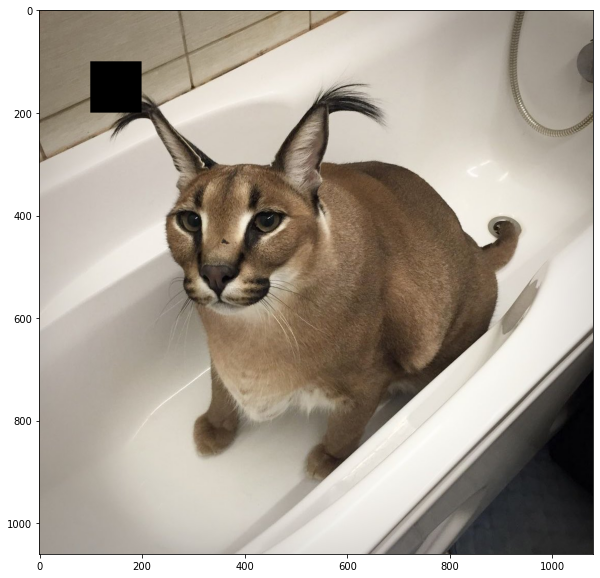

In [10]:
img_rgb_2 = img_rgb.copy()
img_rgb_2[100:200, 100:200] = 0

plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_2)

прибавить какое-либо значение блоку(пикселю):

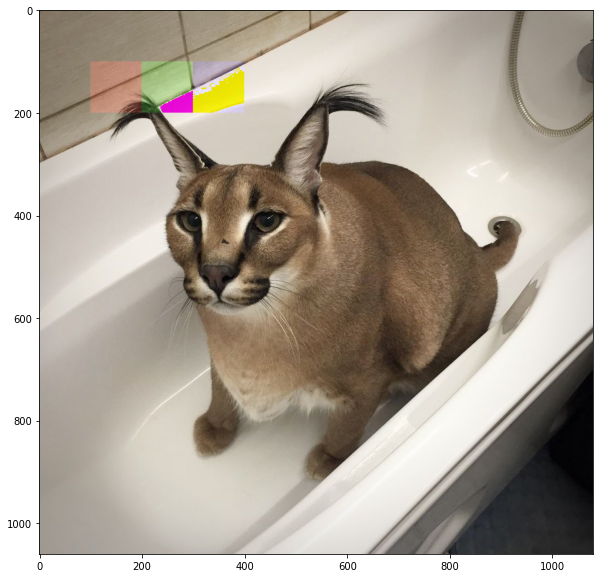

In [11]:
img_rgb_3 = img_rgb.copy()
img_rgb_3[100:200, 100:200, 0] += 40
img_rgb_3[100:200, 200:300, 1] += 40
img_rgb_3[100:200, 300:400, 2] += 40

plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_3)

## Вопрос 1

Что произошло с цветами на изображении img_rgb_2? Почему так произошло?

**Ответ:**

Как было описано выше, нулевой массив отвечает за интенсивность красного цвета, поэтому прибавление в координатах (100:200, 100:200) лишь увеличило интенсивность красного цвета.

Следующие прибавления сработали аналогично, как описано выше, только с зеленым и синим цветами соответственно, не считая случая, где значение всех пикселей было близко к 255 (белый цвет). 

Рассмотрим, к примеру значение массива в точке (180, 255). \\
```
img_rgb_2[180, 285] = [233, 226, 216]
img_rgb_3[180, 285] = [233,  10, 216]
```
После прибавления 40 к 226 мы вышли за границу максимально уровня интенсивности и получили 10 == (226 + 40) % 256 (кол-во уровней интесивности). \\
Таким образом, интенсивность зеленого цвета стала маленькой, в то время как значения красного и синего цветов остались высокими, как следствие этого, получили яркий фиолетовый цвет (как сумма синего и красного).

Ан-но с соседним прибавлением, интенсивность синего цвета сильно уменьшилась, а красный и зеленый остались с высокой, поэтому получили ярко-желтый.


## Упражнение 1 BGR -> RGB
Реализуйте функцию преобразования изображения в формате BGR в формат RGB

In [12]:
def convert_color_bgr_to_rgb(img_bgr):
    return np.flip(img_bgr, axis=2)

In [13]:
assert((img_rgb == convert_color_bgr_to_rgb(img)).all())

## Упражнение 2 Изменение яркости
Одним из простейших преобразований изображения является изменение уровня яркости, задаваемое следующим образом:
$$
f'(x, y) = \alpha f(x, y) + \beta
$$

В данном упражнении необходимо реализовать это преобразование, а также исследовать работу при различных значениях параметров. Какую физическую интерпретацию можно дать этому преобразованию?

In [14]:
def change_intensity(img, alpha=1, beta=0):
    return np.clip(np.rint(float(alpha) * img + beta), 0, 255).astype('uint8')

In [15]:
alpha = 1.2
beta = 10

img_out_cv = np.zeros_like(img_rgb)
cv2.convertScaleAbs(img_rgb, img_out_cv, alpha, beta)

img_out_my = change_intensity(img_rgb, alpha, beta)

assert((img_out_cv == img_out_my).all())

Text(0.5, 1.0, 'Alpha: 10, Beta: 0')

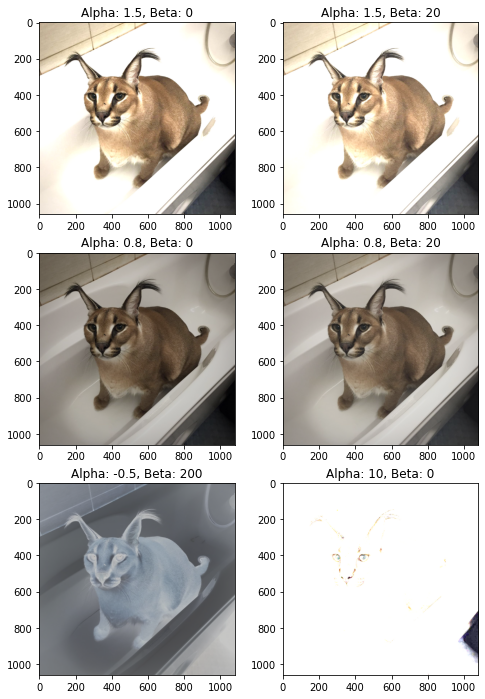

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(8,12))
axs[0, 0].imshow(change_intensity(img_rgb, 1.5, 0))
axs[0, 0].set_title('Alpha: 1.5, Beta: 0')
axs[0, 1].imshow(change_intensity(img_rgb, 1.5, 20))
axs[0, 1].set_title('Alpha: 1.5, Beta: 20')
axs[1, 0].imshow(change_intensity(img_rgb, 0.8, 0.))
axs[1, 0].set_title('Alpha: 0.8, Beta: 0')
axs[1, 1].imshow(change_intensity(img_rgb, 0.8, 20.))
axs[1, 1].set_title('Alpha: 0.8, Beta: 20')
axs[2, 0].imshow(change_intensity(img_rgb, -0.5, 200.))
axs[2, 0].set_title('Alpha: -0.5, Beta: 200')
axs[2, 1].imshow(change_intensity(img_rgb, 10, 0.))
axs[2, 1].set_title('Alpha: 10, Beta: 0')

- $\alpha = 1, \beta = 0$ ничего не меняется
- при $\alpha > 1$ у изображения увеличивается контраст, при $0 < \alpha < 1$ изображение становится менее контрастным
- при $\beta > 0$ яркость увеличивается, при $\beta < 0$ уменьшается
- при $\alpha = 0$ значения зануляется и получаем однотонное полотно черного цвета, при $\beta > 0$ полотно будет менять лишь цвет
- при $\alpha < 0; \beta > 0$ получаем эффект негатива (полная инверсия изображения, светлые области становятся темными и наоборот, также инвертируются цвета: красный становится голубым(cyan), зеленый - фиолетовым(magenta), синий - желтым)


*Физическая интерпретация*: 

- $\beta$ - интенсивность освещения
- $\alpha$ - свойство материала воспринимать освещение (насколько хорошо объект отражает свет, к примеру, на изображениях выше при одинаковой освещенности $\beta = 20$ мы получаем при $\alpha =1.5$ яркое изображение, т.к. объект хорошо отражает свет, а при $\alpha = 0.8$ темное изображение)


## Упражнение 3 Смешивание изображений $\alpha - blend$

Другим простым преобразованием является смешивание двух изображений, задаваемое как:

$$
    f'(x, y) = \alpha f_1(x, y) + (1 - \alpha) f_2(x, y)
$$

Реализуйте данную операцию и продеменстрируйте ее работу на примере. Изображения можно загрузить так же, как это сделано в начале тетрадки.

Приведите примеры, для каких задач может понадобиться данная операция. 

Как она может быть обобщена на большее количество изображений? Выпишите формулу.

In [17]:
def blend(img1, img2, alpha=1):
    img2 = cv2.resize(img2, dsize=img1.shape[:2][::-1])
    return np.clip(np.rint(alpha * img1 + (1 - alpha) * img2), 0, 255).astype('uint8')

In [18]:
!wget http://bgfons.com/upload/fir_tree_PNG5646.png

--2022-02-15 20:36:10--  http://bgfons.com/upload/fir_tree_PNG5646.png
Resolving bgfons.com (bgfons.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to bgfons.com (bgfons.com)|188.114.97.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356222 (348K) [image/png]
Saving to: ‘fir_tree_PNG5646.png.2’

fir_tree_PNG5646.pn 100%[===================>] 347.87K  --.-KB/s    in 0.1s    

2022-02-15 20:36:11 (2.40 MB/s) - ‘fir_tree_PNG5646.png.2’ saved [356222/356222]



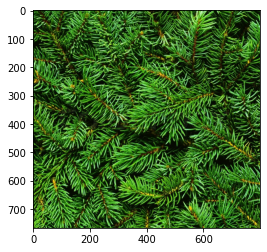

In [19]:
tree_rgb = convert_color_bgr_to_rgb(cv2.imread('fir_tree_PNG5646.png'))
plt.imshow(tree_rgb)

Text(0.5, 1.0, 'Alpha: 0.2')

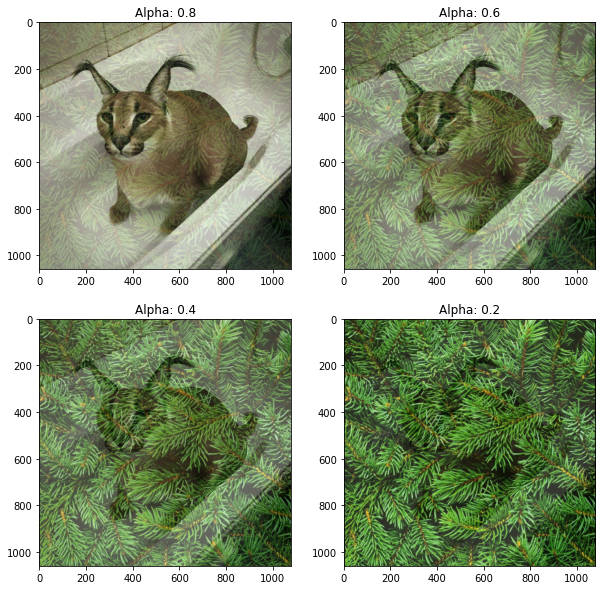

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(blend(img_rgb, tree_rgb, alpha=0.8))
axs[0, 0].set_title('Alpha: 0.8')
axs[0, 1].imshow(blend(img_rgb, tree_rgb, alpha=0.6))
axs[0, 1].set_title('Alpha: 0.6')
axs[1, 0].imshow(blend(img_rgb, tree_rgb, alpha=0.4))
axs[1, 0].set_title('Alpha: 0.4')
axs[1, 1].imshow(blend(img_rgb, tree_rgb, alpha=0.2))
axs[1, 1].set_title('Alpha: 0.2')

Данная формула может быть использована для создания композиции изображений, начиная от фильтров на изображении, как показано выше, заканчивая переносом объекта на новый фон, если у нас есть $\alpha$-маска объекта.

Формула на несколько объектов:

$f'(x, y) = \sum_{i=1}^{n} \alpha_i f_i(x, y)$, при условии что $\sum_{i=1}^{n} \alpha_i = 1$

# Нанесение текста и фигур

С помощью OpenCV можно добавить дополнительные элементы на изображение, такие как текст, простые геометрические фигуры и т.д. (см. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [21]:
TEXT = 'Shlepa 0.99'
UL_CORNER = (250, 300)  # верхний левый угол
FONT = 0                # шрифт
SCALE = 3               # размер
COLOR = (255, 0, 0)     # цвет - красный
THICKNESS = 5           # толшина линий

img_rgb_4 = img_rgb.copy()

cv2.putText(img_rgb_4, TEXT, UL_CORNER, FONT, SCALE, COLOR, THICKNESS)
cv2.rectangle(img_rgb_4, UL_CORNER, (550, 600), COLOR, THICKNESS)
None

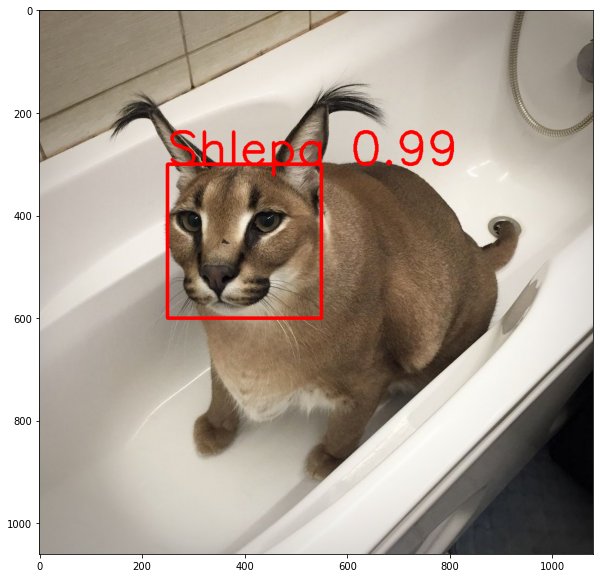

In [22]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_4)

## Вопрос 2

Зачем может понадобиться рисовать на изображении?

**Ответ**: например, при детекции объектов мы предсказываем область, где находится объект, нам может быть полезно нарисовать эту область, чтобы лучше понимать, где алгоритм ошибается, а где нет, также можем подписывать вероятность предсказания данной области и класс объекта, что поможет быстрее прийти к хорошему решению.

# Фильтр Байера

Сырые изображения, приходящие с камеры, являются байеризованными. Они представлены в виде двумерного массива, где отдельные пиксели кодируют интенсивность синего, зеленого, красного цветов. 

![Фильтр Байера](https://gadget-news.net/wp-content/uploads/2019/12/slide-16.jpg)

OpenCV позволяет преобразовывать такие изображения в привычные трехканальные изображения. Этот процесс называется дебайеризация или демозаикинг.


## Вопрос 3

Почему на фильтре Байера зеленых пикселей в 2 раза больше чем синих или красных? Можно ли сделать иначе?

**Ответ:** Потому что так устроено у человека, мы сильнее воспринимаем зеленый цвет, фильтр Байера пытается приблизить это соотношение, чтобы получить аналогичную картинку, что у нас в голове. Можно сделать иначе, но этот фильтр является наиболее удачным.

## Упражнение

Преобразуйте RGB изображение в байеризованное, как на картинке выше, разделив три канала на четыре смежных пикселя

In [23]:
def rgb_to_bayer(img_rgb):
    h, w, c = img_rgb.shape
    bayer_img = np.zeros((2*h, 2*w)).astype('uint8')
    for i in range(h):
        for j in range(w):
            bayer_img[2*i, 2*j] = img_rgb[i, j, 2]
            bayer_img[2*i + 1, 2*j + 1] = img_rgb[i, j, 0]
            bayer_img[2*i + 1, 2*j] = img_rgb[i, j, 1]
            bayer_img[2*i, 2*j + 1] = img_rgb[i, j, 1]
    return bayer_img

посмотрим на кусочек изображения вблизи:

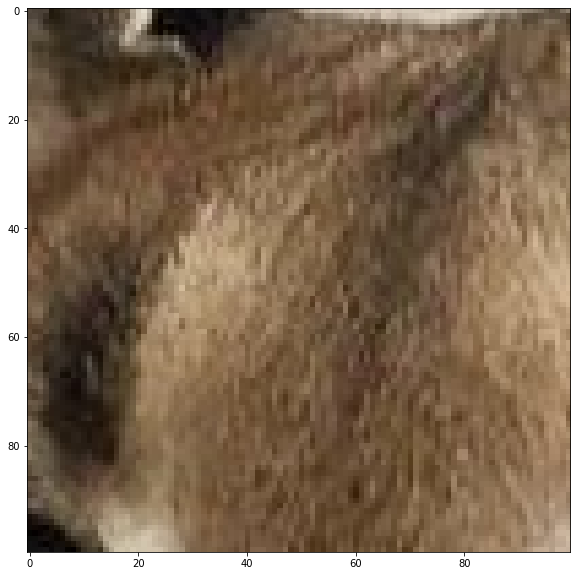

In [24]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb[300:400, 300:400])

Получим его байеризованную версию:

In [25]:
img_bayer = rgb_to_bayer(img_rgb)

Байеризованное изображение должно содержать характерный мазайчный узор:

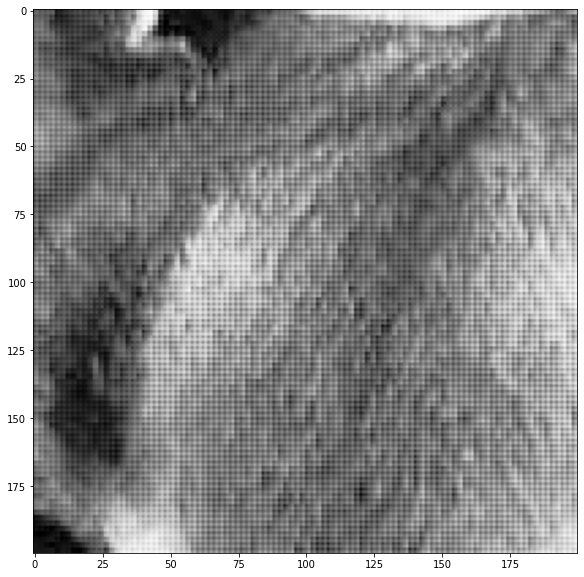

In [26]:
plt.figure(figsize=[10, 10])
plt.imshow(img_bayer[600:800, 600:800], cmap='Greys_r')

Для дебайеризации можно воспользоваться функцией из OpenCV:

In [27]:
img_debayer = cv2.cvtColor(img_bayer, cv2.COLOR_BAYER_RG2RGB)

Если все сделано верно, то дебайеризованное изображение будет похоже на исходное. Однако точного совпадения не будет. Попытайтесь предположить, почему?

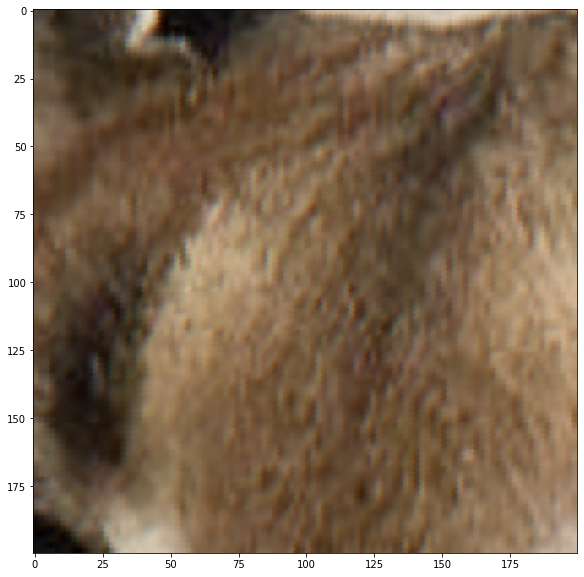

In [28]:
plt.figure(figsize=[10, 10])
plt.imshow(img_debayer[600:800, 600:800])

Изображение увеличилось в 2 раза по обеим осям, поэтому потеряло в качестве и стало более размытым.

# Сжатие/расжатие изображений

Изображения в формате JPEG являются сжатыми изображениями и на диске могут занимать существенно меньше места, чем после загрузки в оперативную память. Чтобы загрузить изображения в сжатом формате, можно просто прочитать файл в бинарном режиме:

In [29]:
with open(IMG_PATH, 'rb') as f:
    img_bytes = f.read()

In [30]:
print('type(img_bytes) = ', type(img_bytes))

type(img_bytes) =  <class 'bytes'>


Считанные данные нужно преобразовать в массив байт для возможности дальнейшего расжатия:

In [31]:
img_buf = np.asarray(bytearray(img_bytes), dtype=np.uint8)

In [32]:
img_buf.shape, img_buf.dtype

((118931,), dtype('uint8'))

In [33]:
img_buf_size = np.array(img_buf.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_size / 1024 / 1024))

Размер сжатого изображения: 0.113 МБ


Как видим, в сжатом виде изображение занимает мало места и в оперативной памяти. Разожмем его с помощью средств OpenCV:

In [34]:
img = cv2.imdecode(img_buf, cv2.IMREAD_COLOR)

In [35]:
img.shape, img.dtype

((1060, 1080, 3), dtype('uint8'))

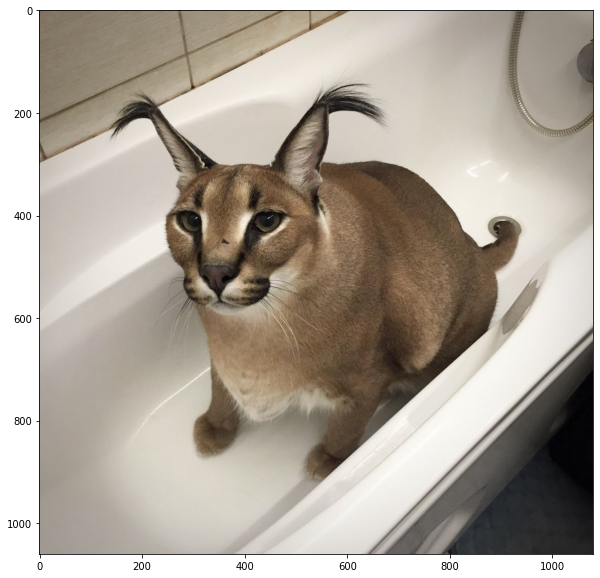

In [36]:
plt.figure(figsize=[10, 10])
plt.imshow(img[:, :, ::-1])

In [37]:
img_size = np.array(img.shape).prod()
print('Размер изображения: {:.3f} МБ'.format(img_size / 1024 / 1024))

Размер изображения: 3.275 МБ


Как видим в несжатом представлении изображение занимает существенно больше памяти. Рассчитаем коэффициент сжатия:

In [38]:
print('Коэффициент сжатия: {:.1f}'.format(img_size / img_buf_size))

Коэффициент сжатия: 28.9


Изображение можно сжать обратно следующим образом:

In [39]:
ok, img_buf_2 = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 10))

In [40]:
img_buf_2_size = np.array(img_buf_2.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_2_size / 1024 / 1024))

Размер сжатого изображения: 0.027 МБ


Алгоритм сжатия определяется указанным расширением, кроме того имеет различные параметры: https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_ImwriteFlags.html. Наиболее используемым является качество сжатия.

Декодируем сжатое с качеством 10 изображение:

In [41]:
img_2 = cv2.imdecode(img_buf_2, cv2.IMREAD_COLOR)

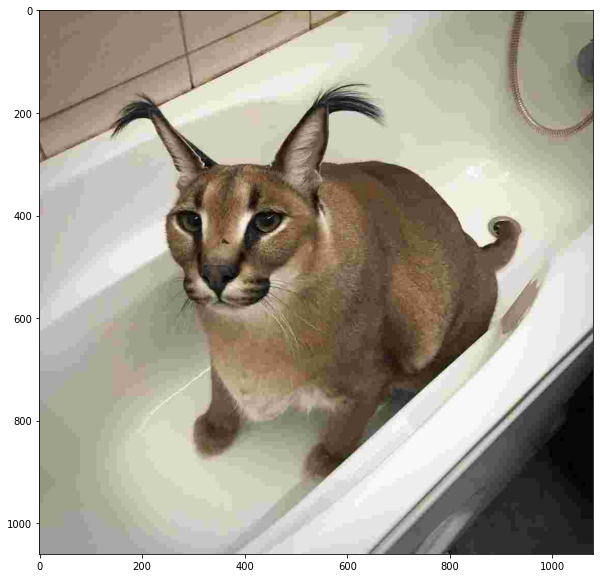

In [42]:
plt.figure(figsize=[10, 10])
plt.imshow(img_2[:, :, ::-1])

## Вопрос 4

Зачем может понадобиться хранить в оперативной памяти сжатые изображения?

Для того, чтобы быстрее отобразить изображение, нам не нужно будет тратить время на загрузку изображения в оперативную память.